# Titanic: Machine learning from disaster- Random Forest

## I - Exploratory data analysis

* Data extraction : we'll load the dataset and have a first look at it.
* Cleaning : we'll fill in missing values.
* Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
* Assumptions : we'll formulate hypotheses from the charts.

1.Import Useful libraries


In [75]:

# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

# seaborn for plotting
import seaborn as sns

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for machine learning libraries
from sklearn.ensemble import RandomForestClassifier

Two datasets are available: a training set and a test set.

2.Loading the training set.


In [76]:
# load training set into a pandas dataframe
data = pd.read_csv('./train.csv')

In [77]:
test_data = pd.read_csv('./test.csv')

3.Show head of the dataframe

In [78]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [79]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.
The other variables that describe the passengers are:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q>

4.Pandas provide Dataframe Information





In [80]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


5.Describe numerical features using the describe method.

In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [82]:
# statistical view of the numeric columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6.Let's now make some charts.

Lets Visaualize some attribute distribution and Survival based on different attributes





In [83]:
print(data.groupby('Survived').count())

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  


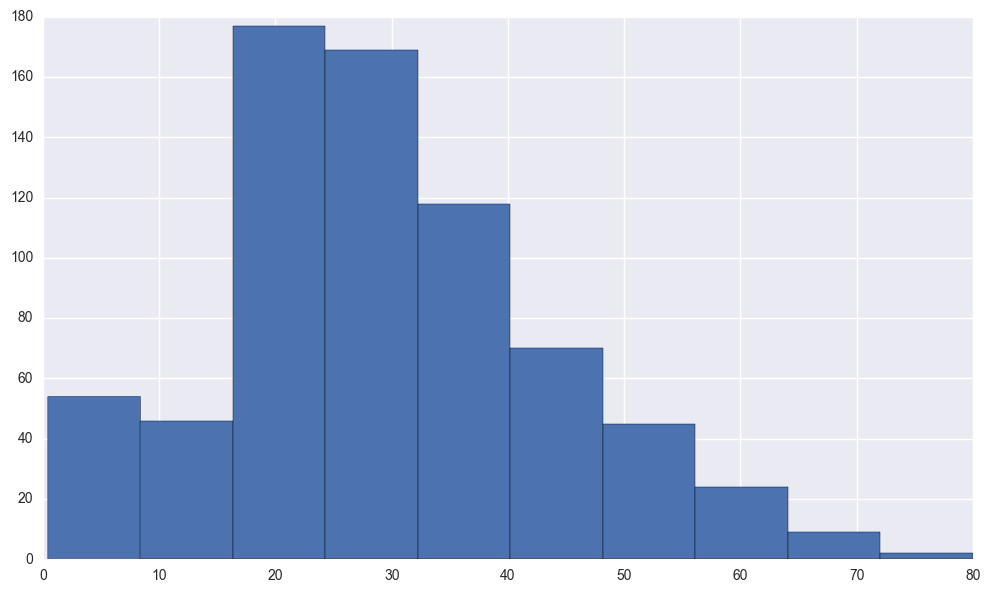

In [84]:
figure = plt.figure(figsize=(12,7))
data.Age.hist()

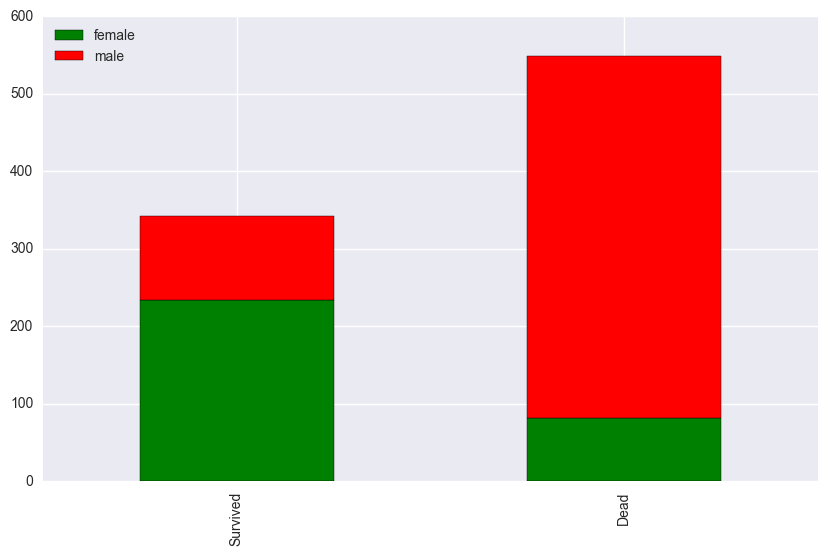

In [85]:
# correlate the survival with the Sex variable.
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,6),color = ['g','r'])

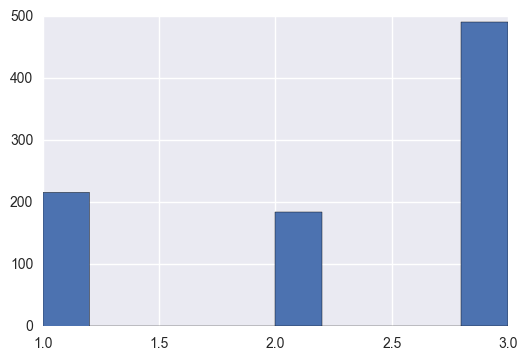

In [86]:
data.Pclass.hist()

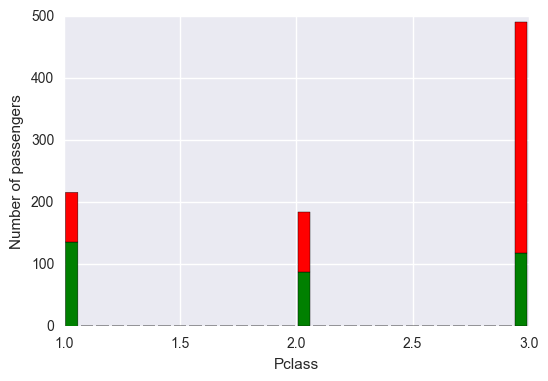

In [87]:
#correlate the survival with the Pclass variable. 
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')

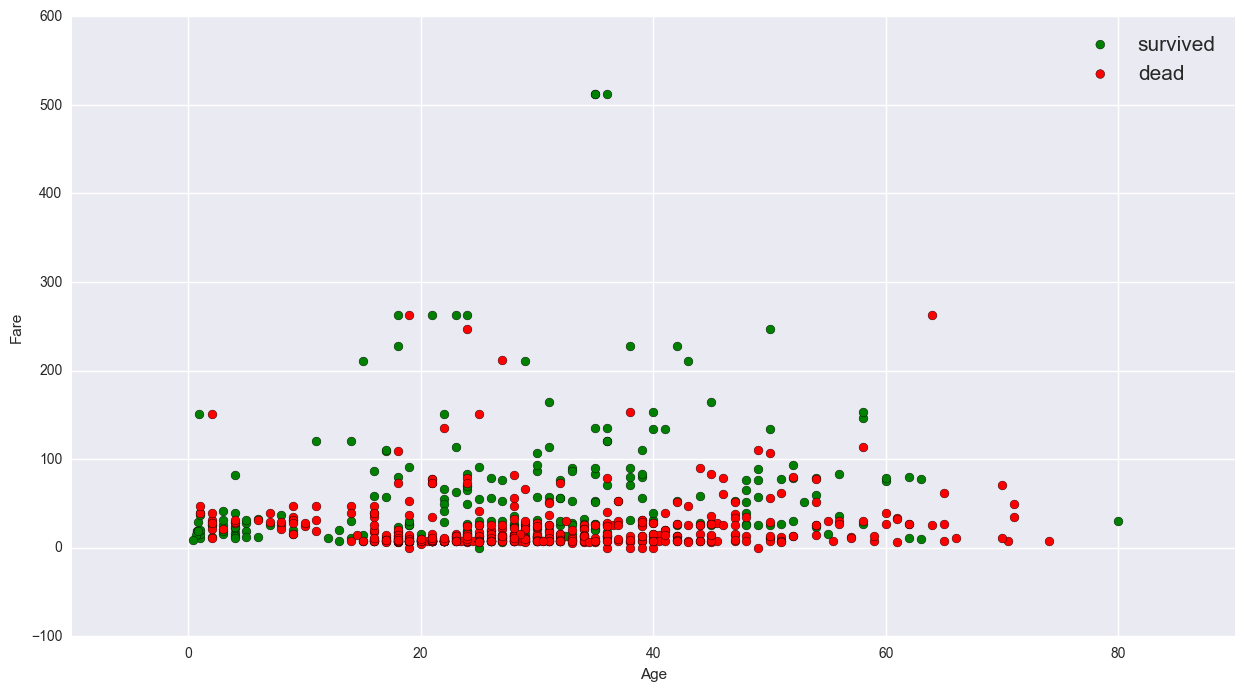

In [88]:
# combine the age, the fare and the survival on a single chart
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

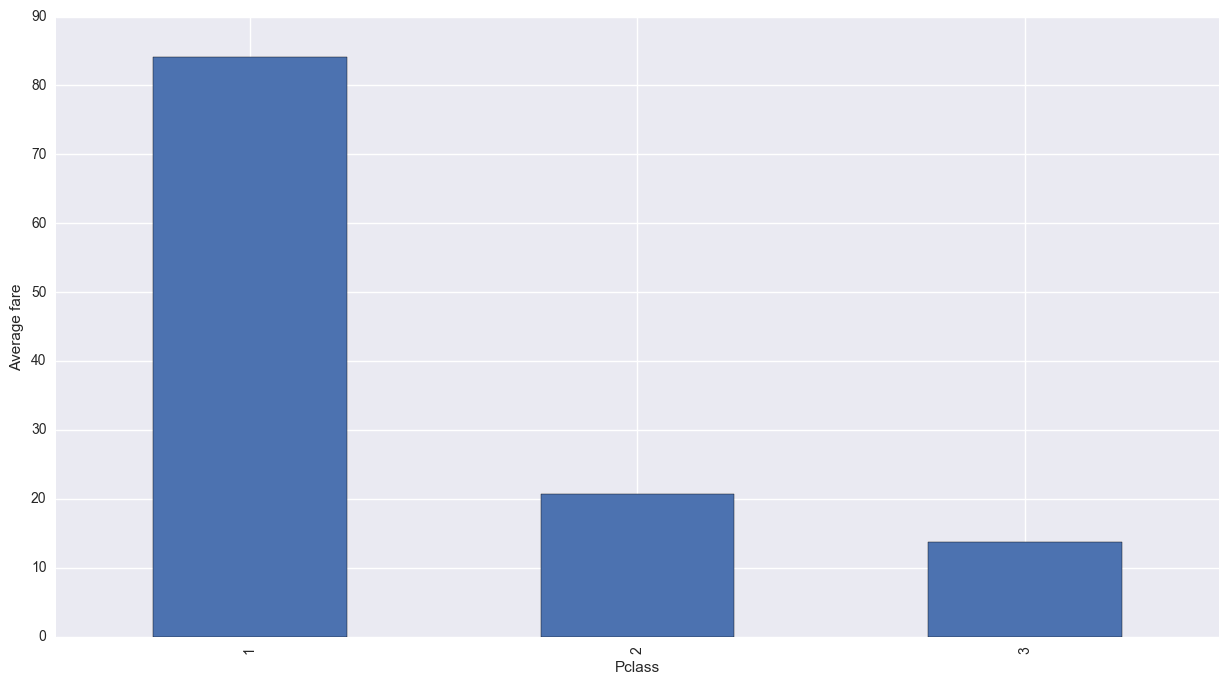

In [89]:
# ticket fare correlates with Pclass
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

## II - Feature engineering

 we append test to train and affect the result to combined

In [90]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./train.csv')
    
    # reading test data
    test = pd.read_csv('./test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [91]:
combined = get_combined_data()

In [92]:
combined.shape


(1309, 11)

In [93]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Processing Age

In [94]:
# find unique values from age attribute
combined.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,
        74.  ,  22.5 ,  18.5 ,  67.  ,  76.  ,  26.5 ,  60.5 ,  11.5 ,
         0.33,   0.17,  38.5 ])

In [95]:
# Filling the missing values with median of Age column
combined['Age'] = combined.Age.fillna(data.Age.median())

In [96]:
# Checking is there any more missing value present
combined.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  28.  ,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,  18.  ,
         3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,  11.  ,
        45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ,
        22.5 ,  18.5 ,  67.  ,  76.  ,  26.5 ,  60.5 ,  11.5 ,   0.33,
         0.17,  38.5 ])

### Processing Sex

In [97]:
#function maps the string values male and female to 0 and 1 respectively.
combined.Sex =combined.Sex.map({'male':0, 'female':1}).astype(int)

In [98]:
#checking the data description
combined.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.355997,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.478997,12.905241,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,22.000000,0.000000,0.000000,NaN
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,NaN
75%,982.000000,3.000000,1.000000,35.000000,1.000000,0.000000,NaN
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [99]:
combined.Sex.unique()

array([0, 1])

### Processing Fare

In [100]:
combined.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [101]:
combined['Fare'] = combined.Fare.fillna(data.Fare.median())

In [102]:
combined.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

### Processing Pclass

In [103]:
combined.Pclass.unique()

array([3, 1, 2])

### Processing SibSp, Parch

In [104]:
combined.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [105]:
combined.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

### Processing Embarked

In [106]:
combined.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [107]:
#function replaces the two missing values of Embarked with the most frequent Embarked value.
print(combined.groupby('Embarked').count());

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Embarked                                                                    
C                 270     270   270  270  270    270    270     270   270   
Q                 123     123   123  123  123    123    123     123   123   
S                 914     914   914  914  914    914    914     914   914   

          Cabin  
Embarked         
C           118  
Q             5  
S           170  


In [108]:
combined.Embarked=combined.Embarked.fillna('S')

In [109]:
combined.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [110]:
#function maps the string values S,C and Q to 2 ,0 and 1 respectively.
Ports = list(enumerate(np.unique(combined['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
combined.Embarked = combined.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int


In [111]:
combined.Embarked.unique()

array([2, 0, 1])

## III - Modeling

We'll be using Random Forests. Random Froests has proven a great efficiency

1.Use the train set to build a predictive model.    

2.Evaluate the model using the train set.

3.Test the model using the test set and generate and output file for the submission.

In [116]:
targets = pd.read_csv('./train.csv').Survived
data = combined.ix[0:890]
test_data = combined.ix[891:]
    
   

In [117]:
df_out = targets
df_features = data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]
df_features
# df_features


,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
0,0,22.0,3,7.2500,1,0,2
1,1,38.0,1,71.2833,1,0,0
2,1,26.0,3,7.9250,0,0,2
3,1,35.0,1,53.1000,1,0,2
4,0,35.0,3,8.0500,0,0,2
5,0,28.0,3,8.4583,0,0,1
6,0,54.0,1,51.8625,0,0,2
7,0,2.0,3,21.0750,3,1,2
8,1,27.0,3,11.1333,0,2,2
9,1,14.0,2,30.0708,1,0,0


In [118]:
clf = RandomForestClassifier()

In [119]:
df_out.shape

(891,)

In [120]:
df_features.shape

(891, 7)

In [121]:
clf=clf.fit(df_features, df_out)
score = clf.score(df_features, df_out)
score
# clf


0.96745230078563416

In [122]:
for header, value in zip(df_features.columns,clf.feature_importances_):
    print (header," : ", value)


Sex  :  0.245675339286
Age  :  0.27199189073
Pclass  :  0.10070346201
Fare  :  0.261873933128
SibSp  :  0.0526075507367
Parch  :  0.0325193963491
Embarked  :  0.0346284277603


In [123]:
test_features=test_data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]

In [124]:
Output = clf.predict(test_features)


In [125]:
for header, value in zip(test_features.columns,clf.feature_importances_):
    print (header," : ", value)

Sex  :  0.245675339286
Age  :  0.27199189073
Pclass  :  0.10070346201
Fare  :  0.261873933128
SibSp  :  0.0526075507367
Parch  :  0.0325193963491
Embarked  :  0.0346284277603


In [126]:
result = pd.DataFrame(columns=['PassengerId', 'Survived'])
result['PassengerId'] = test_data.PassengerId
result['Survived'] = Output.astype(int)
result.to_csv('randomForest.csv', index=False)
# print(result)
test_data['Survived']=result['Survived']

In [51]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,22.0,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,1,0,363272,7.0000,NaN,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",0,35.0,0,0,315154,8.6625,NaN,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,1,1,3101298,12.2875,NaN,2,1
5,897,3,"Svensson, Mr. Johan Cervin",0,28.0,0,0,7538,9.2250,NaN,2,0
6,898,3,"Connolly, Miss. Kate",1,54.0,0,0,330972,7.6292,NaN,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,2.0,1,1,248738,29.0000,NaN,2,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,27.0,0,0,2657,7.2292,NaN,0,1
9,901,3,"Davies, Mr. John Samuel",0,14.0,2,0,A/4 48871,24.1500,NaN,2,0
